# Unspuervised Learning


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clustering


In [55]:
from sklearn.datasets import load_iris

In [56]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

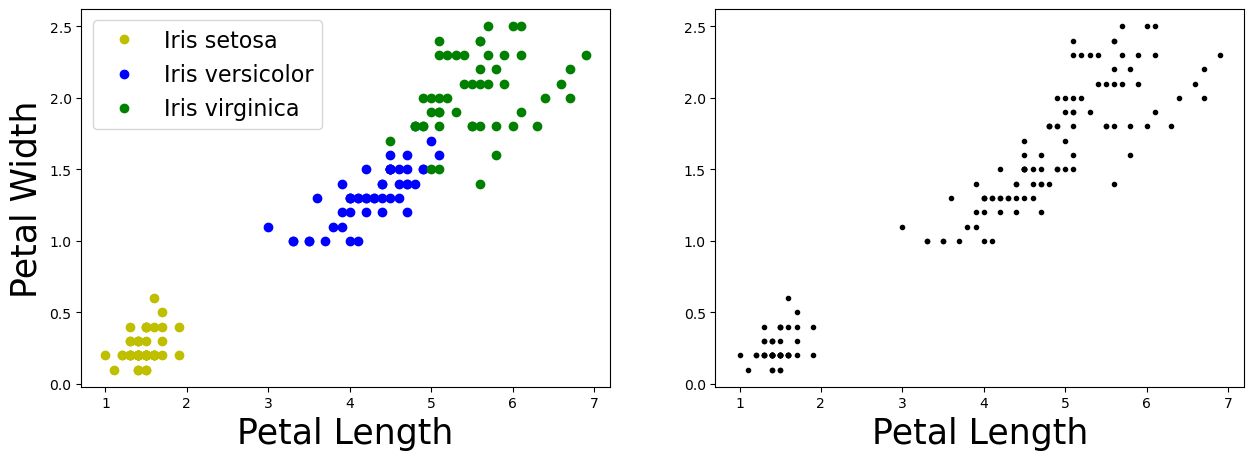

In [57]:
parameters = {'axes.labelsize': 25, 'axes.titlesize': 35}
plt.rcParams.update(parameters)

_, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

axes[0].plot(X[y == 0, 2], X[y == 0, 3], "yo", label="Iris setosa")
axes[0].plot(X[y == 1, 2], X[y == 1, 3], "bo", label="Iris versicolor")
axes[0].plot(X[y == 2, 2], X[y == 2, 3], "go", label="Iris virginica")

axes[0].set(xlabel="Petal Length", ylabel="Petal Width")
axes[0].legend(fontsize=16)

axes[1].scatter(X[:, 2], X[:, 3], c="k", marker=".")
axes[1].set(xlabel="Petal Length")

plt.show()

# GMM Gaussian Mixure Model

A Gaussian mixture model can actually seperate these clusters well:

(4 feats: Petal / Sepal & width / length)


In [58]:
from sklearn.mixture import GaussianMixture

In [59]:
gm = GaussianMixture(n_components=3, random_state=42)
# 3 species?

In [60]:
y_pred = gm.fit_predict(X)

Map each cluster to a class.

Instead of hard coding the mapping (as is done in the book, for simplicity), we will pick the most common class for each cluster (using the `scipy.stats.mode()` function):


In [61]:
from scipy import stats

In [62]:
np.unique(y_pred)

array([0, 1, 2])

In [63]:
mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y == class_id])
    mapping[mode[0]] = class_id

mapping  # ??


{1: 0, 2: 1, 0: 2}

In [64]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

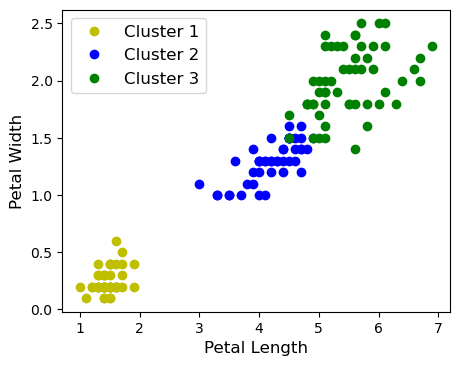

In [65]:
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

_, ax = plt.subplots(figsize=(5, 4), dpi=100)

ax.plot(X[y_pred == 0, 2], X[y_pred == 0, 3], "yo", label="Cluster 1")
ax.plot(X[y_pred == 1, 2], X[y_pred == 1, 3], "bo", label="Cluster 2")
ax.plot(X[y_pred == 2, 2], X[y_pred == 2, 3], "go", label="Cluster 3")

ax.set(xlabel="Petal Length", ylabel="Petal Width")
ax.legend(fontsize=12)

plt.show()

In [66]:
np.sum(y_pred == y) / len(y)

0.9666666666666667

**Note**: the results in this notebook may differ slightly from the book. This is because algorithms can sometimes be tweaked a bit between Scikit-Learn versions.


# K-means


In [67]:
from sklearn.datasets import make_blobs

In [68]:
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8],
                         [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [69]:
X, y = make_blobs(n_samples=2000,
                  centers=blob_centers,
                  cluster_std=blob_std,
                  random_state=7)


In [70]:
def plot_clusters(X, y=None):
    _, ax = plt.subplots(figsize=(8, 4), dpi=100)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=1)
    ax.set(xlabel='$x_1$', ylabel='$x_2$')


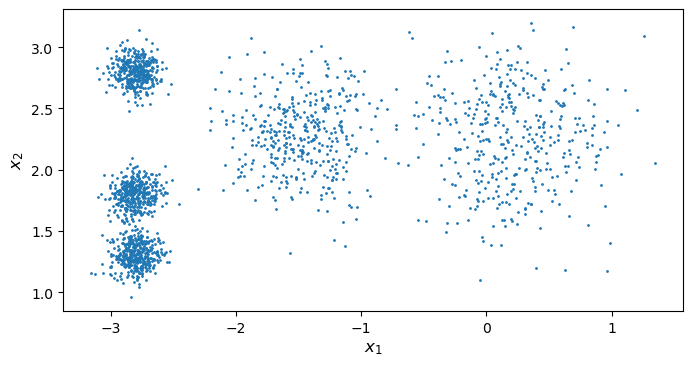

In [71]:
 parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)


plot_clusters(X)
plt.show()

## Fit and predict

Train a K-means cluster on this dataset


In [72]:
from sklearn.cluster import KMeans

In [73]:
k = 5  # later


In [74]:
kmeans = KMeans(n_clusters=k, random_state=42)

In [75]:
y_pred = kmeans.fit_predict(X)

Each instance was assigned to onee of the five clusters.


In [76]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [77]:
y_pred == kmeans.labels_

array([ True,  True,  True, ...,  True,  True,  True])

In [78]:
y_pred is kmeans.labels_

True

In [79]:
# find the cluster centers
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [80]:
# try some prediction:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

## Decision Boundaries


In [81]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0],
                centroids[:, 1],
                marker='o',
                s=35,
                linewidth=8,
                color=circle_color,
                zorder=10,
                alpha=0.9)
    plt.scatter(centroids[:, 0],
                centroids[:, 1],
                marker='x',
                s=2,
                linewidth=12,
                color=cross_color,
                zorder=11,
                alpha=1)


def plot_decision_boundaries(clusterer,
                             X,
                             resolution=1000,
                             show_centroids=True,
                             show_xlabels=True,
                             show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z,
                 extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(Z,
                extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidth=1,
                colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,


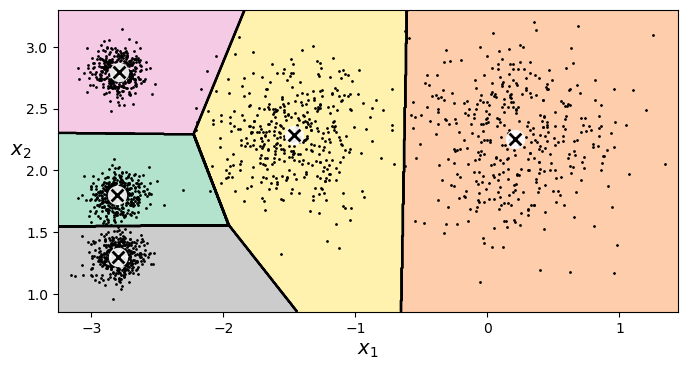

In [82]:
plt.figure(figsize=(8, 4), dpi=100)
plot_decision_boundaries(kmeans, X, resolution=1000)
plt.show()

### Hard Clustering _vs_ Soft Clustering

Rather than arbitrarily choosing the closest cluster for each instance, which is called _hard clustering_, it might be better measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:


In [83]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

You can verify that this is indeed the Euclidian distance between each instance and each centroid:


In [84]:
np.linalg.norm(np.tile(X_new,
                       (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_,
               axis=2)


array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

## K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:

- First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
- Repeat until convergence (i.e., until the centroids stop moving):
  - Assign each instance to the closest centroid.
  - Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:


In [85]:
kmeans_iter_1 = KMeans(n_clusters=5,
                       init="random",
                       n_init=1,
                       algorithm="full",
                       max_iter=1,
                       random_state=0)
kmeans_iter_2 = KMeans(n_clusters=5,
                       init="random",
                       n_init=1,
                       algorithm="full",
                       max_iter=2,
                       random_state=0)
kmeans_iter_3 = KMeans(n_clusters=5,
                       init="random",
                       n_init=1,
                       algorithm="full",
                       max_iter=3,
                       random_state=0)
kmeans_iter_1.fit(X)
kmeans_iter_2.fit(X)
kmeans_iter_3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,


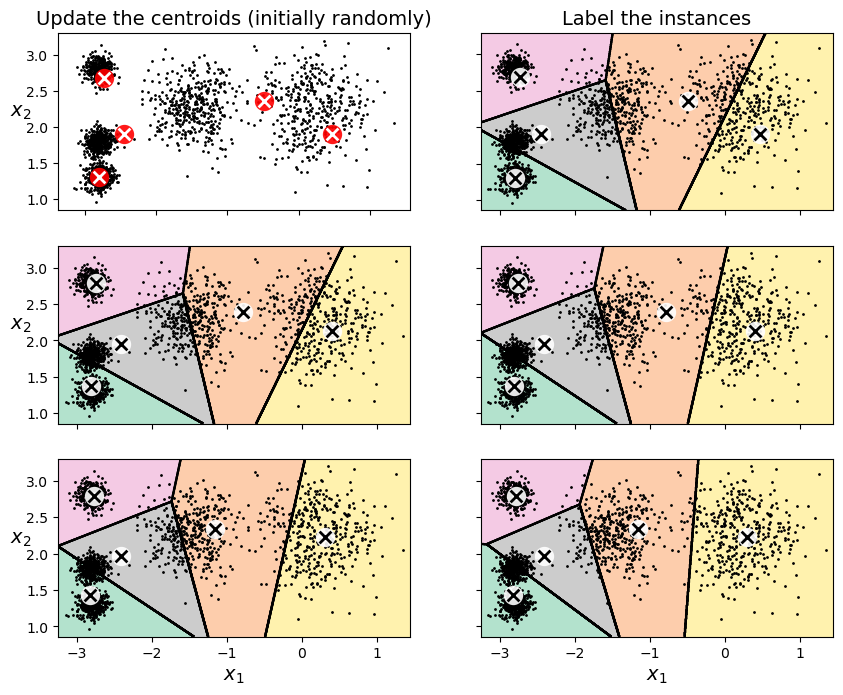

In [86]:
plt.figure(figsize=(10, 8), dpi=100)

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter_1.cluster_centers_,
               circle_color='r',
               cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter_1,
                         X,
                         resolution=1000,
                         show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter_1,
                         X,
                         resolution=1000,
                         show_xlabels=False,
                         show_centroids=False)
plot_centroids(kmeans_iter_2.cluster_centers_, )

plt.subplot(324)
plot_decision_boundaries(kmeans_iter_2,
                         X,
                         show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter_2, X, show_centroids=False)
plot_centroids(kmeans_iter_3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter_3, X, show_ylabels=False)

plt.show()


## K-means Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:


In [87]:
def plot_clusterer_comparison(clusterer1,
                              clusterer2,
                              X,
                              title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)


/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,


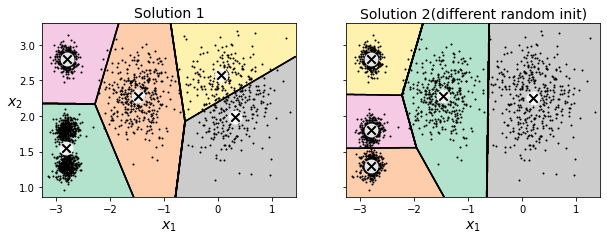

In [88]:
kmeans_rnd_init_1 = KMeans(n_clusters=5,
                           init="random",
                           n_init=1,
                           algorithm="full",
                           random_state=2)
kmeans_rnd_init_2 = KMeans(n_clusters=5,
                           init="random",
                           n_init=1,
                           algorithm="full",
                           random_state=5)

plot_clusterer_comparison(kmeans_rnd_init_1, kmeans_rnd_init_2, X,
                          "Solution 1", "Solution 2(different random init)")

plt.show()

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:


In [89]:
kmeans.inertia_

211.5985372581684

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:


In [90]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(X_dist.shape[0]), kmeans.labels_]**2)
# np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816862

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_greater is better_" rule.


In [91]:
kmeans.score(X)

-211.59853725816834

### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:


In [92]:
kmeans_rnd_init_1.inertia_, kmeans_rnd_init_2.inertia_


(219.43539442771393, 211.59853725816836)

As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.


In [93]:
kmeans_rnd_init_10 = KMeans(n_clusters=5,
                            init="random",
                            n_init=10,
                            algorithm="full",
                            random_state=42)
kmeans_rnd_init_10.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=42)

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).


/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,


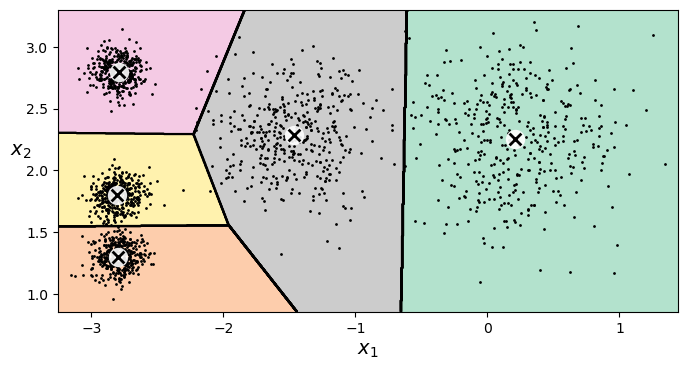

In [94]:
plt.figure(figsize=(8, 4), dpi=100)

plot_decision_boundaries(kmeans_rnd_init_10, X)

plt.show()

### K-means++

Instead of initializing the centroids entirely randomly, it is preferable to initialize them using the following algorithm, proposed in a [2006 paper](https://goo.gl/eNUPw6) by David Arthur and Sergei Vassilvitskii:

- Take one centroid $c_1$, chosen uniformly at random from the dataset.
- Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $∑\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
- Repeat the previous step until all $k$ centroids have been chosen.

The rest of the K-Means++ algorithm is just regular K-Means. With this initialization, the K-Means algorithm is much less likely to converge to a suboptimal solution, so it is possible to reduce `n_init` considerably. Most of the time, this largely compensates for the additional complexity of the initialization process.

To set the initialization to K-Means++, simply set `init="k-means++"` (this is actually the default):


In [95]:
KMeans()

KMeans()

In [96]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)

kmeans.fit(X)

kmeans.inertia_

211.59853725816836

### Accelerated K-means

The K-Means algorithm can be significantly accelerated by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality (given three points A, B and C, the distance AC is always such that AC ≤ AB + BC) and by keeping track of lower and upper bounds for distances between instances and centroids (see this [2003 paper](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) by Charles Elkan for more details).

To use Elkan's variant of K-Means, just set `algorithm="elkan"`. Note that it does not support sparse data, so by default, Scikit-Learn uses `"elkan"` for dense data, and `"full"` (the regular K-Means algorithm) for sparse data.


In [97]:
# get_ipython().run_line_magic(
#     'timeit', '-n 50 KMeans(algorithm="elkan", random_state=42).fit(X)')

In [98]:
# get_ipython().run_line_magic(
#     'timeit', '-n 50 KMeans(algorithm="full", random_state=42).fit(X)')

### Mini-Batch K-Means

Scikit-Learn also implements a variant of the K-Means algorithm that supports mini-batches (see [this paper](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):


In [99]:
from sklearn.cluster import MiniBatchKMeans

In [100]:
minibatches_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatches_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [101]:
minibatches_kmeans.inertia_

211.65239850433193

If the dataset does not fit in memory, the simplest option is to use the `memmap` class, just like we did for incremental PCA in the previous chapter. First let's load MNIST:


In [102]:
X = pd.read_feather('../data/mnist_784_X.feather')
y = pd.read_feather('../data/mnist_784_y.feather')
y = y.astype(np.int32)

## mnist_784_X/y.feather not suitable for this code

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [109]:
# filename = "my_mnist.data"
# X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
# X_mm[:] = X_train


In [110]:
# minibatch_kmeans = MiniBatchKMeans(n_clusters=10,
#                                    batch_size=10,
#                                    random_state=42)
# minibatch_kmeans.fit(X_mm)

If your data is so large that you cannot use `memmap`, things get more complicated. Let's start by writing a function to load the next batch (in real life, you would load the data from disk):


In [111]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]


Now we can train the model by feeding it one batch at a time. We also need to implement multiple initializations and keep the model with the lowest inertia:


In [112]:
np.random.seed(42)


In [113]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

In [114]:
# for init in range(n_init):
#     minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
#     X_init = load_next_batch(init_size)
#     minibatch_kmeans.partial_fit(X_init)

#     minibatch_kmeans.sum_inertia_ = 0
#     for iteration in range(n_iterations):
#         X_batch = load_next_batch(batch_size)
#         minibatch_kmeans.partial_fit(X_batch)
#         if iteration >= n_iterations - evaluate_on_last_n_iters:
#             minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

#     if (best_kmeans is None
#             or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
#         best_kmeans = minibatch_kmeans

In [115]:
# from timeit import timeit
## ！take care slow

In [116]:
# times = np.empty((100, 2))
# inertias = np.empty((100, 2))
# for k in range(1, 101):
#     kmeans_ = KMeans(n_clusters=k, random_state=42)
#     minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
#     print("\r{}/{}".format(k, 100), end="")
#     times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
#     times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)",
#                              number=10,
#                              globals=globals())
#     inertias[k - 1, 0] = kmeans_.inertia_
#     inertias[k - 1, 1] = minibatch_kmeans.inertia_

In [117]:
# plt.figure(figsize=(10, 4))

# plt.subplot(121)
# plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
# plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
# plt.xlabel("$k$", fontsize=16)
# plt.title("Inertia", fontsize=14)
# plt.legend(fontsize=14)
# plt.axis([1, 100, 0, 100])

# plt.subplot(122)
# plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
# plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
# plt.xlabel("$k$", fontsize=16)
# plt.title("Training time (seconds)", fontsize=14)
# plt.axis([1, 100, 0, 6])

# plt.show()


In [118]:
# X = pd.read_feather('../data/mnist_784_X.feather')
# y = pd.read_feather('../data/mnist_784_y.feather')
# y = y.astype(np.int32)

In [119]:
# kmeans_k3 = KMeans(n_clusters=3, random_state=42)
# kmeans_k8 = KMeans(n_clusters=8, random_state=42)

# plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
# plt.show()


In [120]:
X = pd.read_feather('../data/mnist_784_X.feather')
y = pd.read_feather('../data/mnist_784_y.feather')
y = y.astype(np.int32)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [122]:
from sklearn.cluster import MiniBatchKMeans


In [123]:
n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model

kmeans = MiniBatchKMeans(n_clusters=n_digits)

# Fit the model to the training data

kmeans.fit(X)

kmeans.labels_

10


array([5, 2, 0, ..., 3, 4, 8], dtype=int32)

In [124]:
kmeans.score(X)

-180986263059.6847

In [125]:
from sklearn.metrics import silhouette_score


In [126]:
# silhouette_score(X, kmeans.labels_)

0.053314615033142

In [127]:
# silhouette_scores = [
#     silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]
# ]


In [128]:
# plt.figure(figsize=(8, 3))
# plt.plot(range(2, 10), silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# plt.show()


In [129]:
##  to be continued

### Limits of K-means


In [130]:
X_1, y_1 = make_blobs(n_samples=1000,
                      centers=((4, -4), (0, 0)),
                      random_state=42)
X_1 = X_1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X_2, y_2 = make_blobs(n_samples=1000, centers=1, random_state=42)
X_2 = X_2 + [6, -8]
X = np.r_[X_1, X_2]
y = np.r_[y_1, y_2]

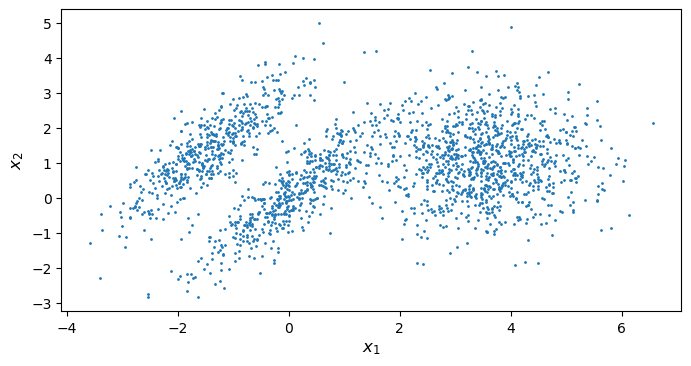

In [131]:
plot_clusters(X)

In [132]:
kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1,
                     random_state=42)

kmeans_bad = KMeans(n_clusters=3, random_state=42)

kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

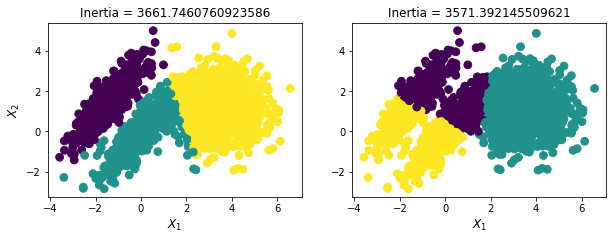

In [133]:
_, axes = plt.subplots(1, 2, figsize=(10, 3.2))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_good.labels_, s=60)
axes[0].set(title=f"Inertia = {kmeans_good.inertia_}",
            ylabel="$X_2$",
            xlabel="$X_1$")

axes[1].scatter(X[:, 0], X[:, 1], c=kmeans_bad.labels_, s=60)
axes[1].set(title=f"Inertia = {kmeans_bad.inertia_}", xlabel="$X_1$")
plt.show()

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/2072250143.py:42: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(Z,


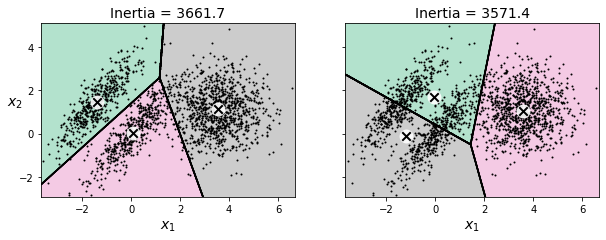

In [134]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

## Clustering applications

### Clustering for image segmentation


In [135]:
from matplotlib.image import imread

In [136]:
image = imread('./img/ladybug.png')
image.shape

(533, 800, 3)

In [137]:
X = image.reshape(-1, 3)


In [138]:
X.shape

(426400, 3)

In [139]:
kmeansF = KMeans(n_clusters=8, random_state=42).fit(X)

In [140]:
segmented_img = kmeansF.cluster_centers_[kmeansF.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [141]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

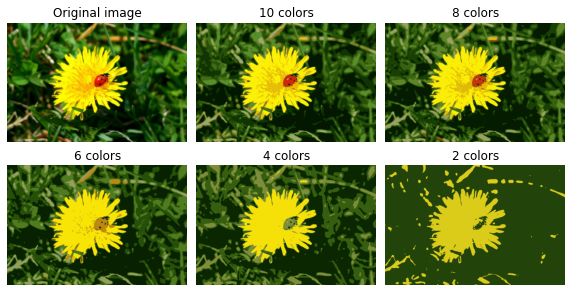

In [142]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### Clustering for preprocessing


Let's tackle the _digits dataset_ which is a simple MNIST-like dataset containing 1,797 grayscale 8×8 images representing digits 0 to 9.


In [143]:
from sklearn.datasets import load_digits

In [144]:
X_digits, y_digits = load_digits(return_X_y=True)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_digits,
                                                    y_digits,
                                                    random_state=42)


In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
log_reg = LogisticRegression(multi_class="ovr",
                             solver="lbfgs",
                             max_iter=5000,
                             random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [148]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

Okay, that's our baseline: 96.89% accuracy. **Let's see if we can do better by using K-Means as a preprocessing step**. We will create a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to the 50 clusters, then apply a logistic regression model:


In [149]:
from sklearn.pipeline import Pipeline


In [150]:
pipeline = Pipeline([("kmeans", KMeans(n_clusters=50, random_state=42)),
                     ("log_reg",
                      LogisticRegression(multi_class="ovr",
                                         solver="lbfgs",
                                         max_iter=5000,
                                         random_state=42))])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [151]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

In [152]:
#  How much did the error rate drop?
error_drop = round((1 - (1 - pipeline_score) / (1 - log_reg_score)), 4) * 100
print(f"The error rate dorps {error_drop} %")

The error rate dorps 28.57 %


- We reduced the error rate by over 28%.

- But we chose the number of clusters $k$ completely arbitrarily, we can surely do better.
- Since K-Means is just a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier: there's no need to perform silhouette analysis or minimize the inertia, the best value of $k$ is simply the one that results in the best classification performance.


In [153]:
from sklearn.model_selection import GridSearchCV

**Warning**: the following cell may take close to 20 minutes to run, or more depending on your hardware.


In [154]:
# param_grid = dict(kmeans__n_clusters=range(2, 100))
# grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
# grid_clf.fit(X_train, y_train)


In [155]:
# grid_clf.best_params_

In [156]:
# grid_clf.score(X_test, y_test)

## Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances.

Let's look at the performance of a logistic regression model when we only have 50 labeled instances:


In [157]:
n_labeled = 50

In [158]:
log_reg = LogisticRegression(multi_class="ovr",
                             solver="lbfgs",
                             random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])


LogisticRegression(multi_class='ovr', random_state=42)

In [159]:
log_reg.score(X_test, y_test)


0.8333333333333334

In [160]:
k = 50


In [161]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)


In [162]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

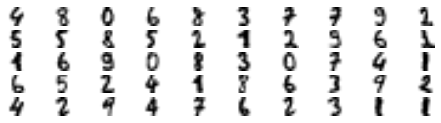

In [163]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8),
               cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()


In [164]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [165]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5, 1, 2, 9, 5, 2, 7, 8, 1, 8, 6, 3, 2, 5, 4, 5,
    4, 0, 3, 2, 6, 1, 7, 7, 9, 1, 8, 6, 5, 4, 8, 5, 3, 3, 6, 7, 9, 7, 8, 4, 9
])


Now we have a dataset with just 50 labeled instances, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better:


In [166]:
log_reg = LogisticRegression(multi_class="ovr",
                             solver="lbfgs",
                             max_iter=5000,
                             random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.10444444444444445

In [167]:
log_reg.score(X_test, y_test)


0.10444444444444445

??? trouble here


In [168]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(k):
    y_train_propagated[kmeans.labels_ == 1] = y_representative_digits[i]

In [169]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs")
log_reg.fit(X_train, y_train_propagated)

/usr/local/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Caskroom/miniconda/base/envs/p39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LogisticRegression(multi_class='ovr')

In [170]:
log_reg.score(X_test, y_test)


0.08222222222222222

We got a tiny little accuracy boost. Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid, because by propagating to the full cluster, we have certainly included some outliers. Let's only propagate the labels to the 75th percentile closest to the centroid:


In [171]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [172]:
partially_propagated = (X_cluster_dist != 1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [173]:
log_reg.score(X_test, y_test)


0.08222222222222222

In [174]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.034892353377876766

# DBSCAN


In [175]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [176]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)


In [177]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [178]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [179]:
len(dbscan.core_sample_indices_)

808

In [180]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [181]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [182]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [183]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [184]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0],
                cores[:, 1],
                c=dbscan.labels_[core_mask],
                marker='o',
                s=size,
                cmap="Paired")
    plt.scatter(cores[:, 0],
                cores[:, 1],
                marker='*',
                s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0],
                non_cores[:, 1],
                c=dbscan.labels_[non_core_mask],
                marker=".")

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps},min_samples={dbscan.min_samples}",
              fontsize=14)


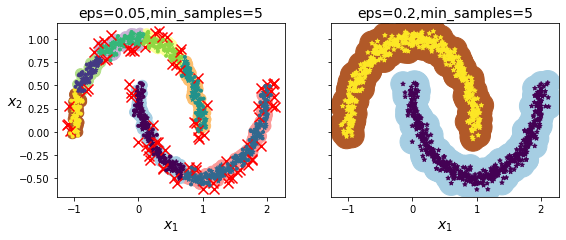

In [185]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [186]:
# dbscan = dbscan2

# Gaussian Mixtures


In [187]:
X_1, y_1 = make_blobs(n_samples=1000,
                      centers=((-4, 4), (0, 0)),
                      random_state=42)
X_1 = X_1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X_2, y_2 = make_blobs(n_samples=250, centers=1, random_state=42)

X_2 = X_2 + [6, -8]
X = np.r_[X_1, X_2]
y = np.r_[y_1, y_2]


In [188]:
from sklearn.mixture import GaussianMixture

In [189]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

Let's look at the parameters that the EM algorithm estimated:


In [190]:
gm.weights_

array([0.3691158 , 0.24310082, 0.38778338])

In [191]:
gm.means_

array([[ 1.36694892, -1.52070558],
       [ 3.25921214,  0.93270945],
       [ 0.04704152,  0.07882469]])

In [192]:
gm.covariances_

array([[[0.5545037 , 0.61612027],
        [0.61612027, 0.97543142]],

       [[1.20764909, 0.12733675],
        [0.12733675, 0.94475273]],

       [[0.69619211, 0.81103875],
        [0.81103875, 1.23251215]]])

Check whether the algorithm conveged


In [193]:
gm.converged_

True

how many iterations make it converged?


In [194]:
gm.n_iter_

5

In [195]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

This is a generative model, so you can sample new instances from it (and get their labels):


In [196]:
X_new, y_new = gm.sample(6)
X_new

array([[ 0.50053221, -1.84863725],
       [ 1.59330363, -1.3400245 ],
       [ 1.34443667,  0.93984521],
       [ 3.55505726,  1.60572007],
       [ 3.90642055,  0.7199157 ],
       [ 0.37057109, -0.55753105]])

In [197]:
y_new

array([0, 0, 1, 1, 1, 2])

Notice that they are sampled sequentially from each cluster.

You can also estimate the log of the _probability density function_ (PDF) at any location using the `score_samples()` method:


In [198]:
gm.score_samples(X)

array([-2.58839759, -3.55461436, -3.33388476, ..., -3.23884872,
       -4.34697093, -3.61170653])

Let's check that the PDF integrates to 1 over the whole space. We just take a large square around the clusters, and chop it into a grid of tiny squares, then we compute the approximate probability that the instances will be generated in each tiny square (by multiplying the PDF at one corner of the tiny square by the area of the square), and finally summing all these probabilities). The result is very close to 1:


In [199]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution)**2
pdf_probas.sum()

0.9999999998928363

Now let's plot the resulting decision boundaries (dashed lines) and density contours:


In [200]:
from matplotlib.colors import LogNorm

In [201]:
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx,
                 yy,
                 Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx,
                yy,
                Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidth=1,
                colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth', 'lss'
  plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')


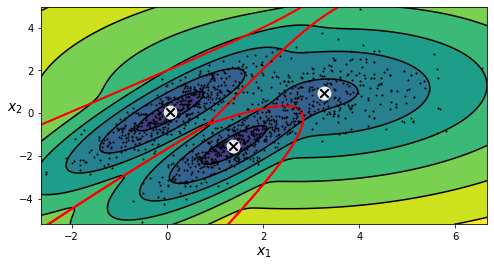

In [202]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)


You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:

![](https://i.stack.imgur.com/0zLpe.png)

- `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size.
- `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix).
- `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances)
- `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal).m

check [stackoverflow](https://stats.stackexchange.com/questions/326671/different-covariance-types-for-gaussian-mixture-models) for more about covaraiance type


In [203]:
gm_full = GaussianMixture(n_components=3,
                          n_init=10,
                          covariance_type="full",
                          random_state=42)
gm_tied = GaussianMixture(n_components=3,
                          n_init=10,
                          covariance_type="tied",
                          random_state=42)
gm_spherical = GaussianMixture(n_components=3,
                               n_init=10,
                               covariance_type="spherical",
                               random_state=42)
gm_diag = GaussianMixture(n_components=3,
                          n_init=10,
                          covariance_type="diag",
                          random_state=42)

In [204]:
gm_full.fit(X)
gm_tied.fit(X)
gm_diag.fit(X) 
gm_spherical.fit(X)

GaussianMixture(covariance_type='spherical', n_components=3, n_init=10,
                random_state=42)

In [205]:
def compare_gaussian_mixtures(gm1,gm2,X):
    plt.rcParams['font.size'] = '14'
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1,X)
    plt.title(f"Covariance Type: {gm1.covariance_type}")

    plt.subplot(122)
    plot_gaussian_mixture(gm1,X,show_ylabels=False)
    plt.title(f"Covariance Type: {gm2.covariance_type}")

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth', 'lss'
  plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth', 'lss'
  plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')


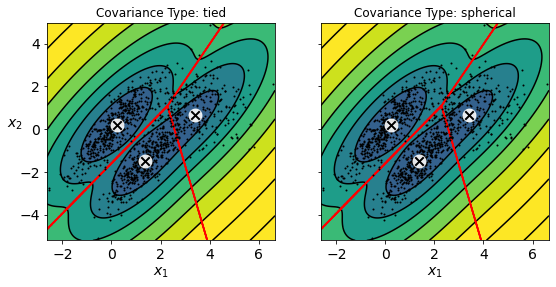

In [206]:
compare_gaussian_mixtures(gm_tied,gm_spherical,X)

plt.show()

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth', 'lss'
  plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth', 'lss'
  plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')


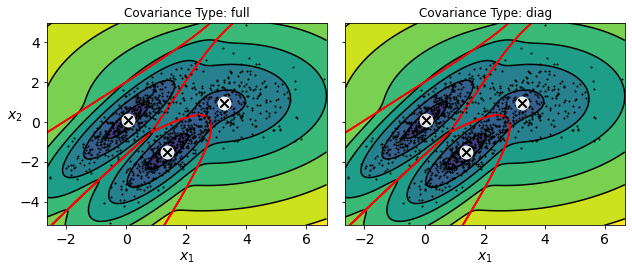

In [207]:
compare_gaussian_mixtures(gm_full,gm_diag,X)
plt.tight_layout()
plt.show()




 ## Anomaly Detection using Gaussian Mixtures

 Gaussian Mixtures can be used for _anomaly detection_: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density:

In [208]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [209]:
densities = gm.score_samples(X)
# ValueError: X has 3 features, but GaussianMixture is expecting 2 features as input.
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth', 'lss'
  plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')


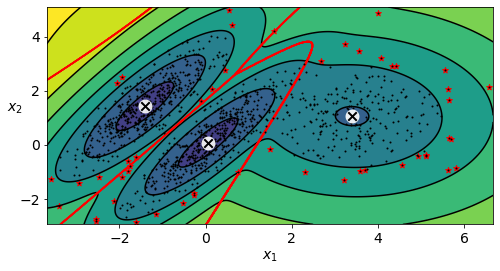

In [210]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()


### Model selection

 We cannot use the inertia or the silhouette score because they both assume that the clusters are spherical. Instead, we can try to find the model that minimizes a theoretical information criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC):

 ${BIC} = {\log(m)p - 2\log({\hat L})}$

 ${AIC} = 2p - 2\log(\hat L)$

 * $m$ is the number of instances.
 * $p$ is the number of parameters learned by the model.
 * $\hat L$ is the maximized value of the likelihood function of the model. This is the conditional probability of the observed data $\mathbf{X}$, given the model and its optimized parameters.

 Both BIC and AIC penalize models that have more parameters to learn (e.g., more clusters), and reward models that fit the data well (i.e., models that give a high likelihood to the observed data).

In [211]:
gm.bic(X)

8189.747000497186

In [212]:
gm.aic(X)

8102.521720382148

Compute BIA AIC manually:

In [213]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) / 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance

max_log_likelihood = gm.score(X) * len(X) #Log(L^)
bic = np.log(len(X)) * n_params -2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood


In [214]:
aic

8102.521720382148

In [215]:
bic

8189.747000497186

 There's one weight per cluster, but the sum must be equal to 1, so we have one degree of freedom less, hence the -1. Similarly, the degrees of freedom for an $n × n$ covariance matrix is not $n^2$, but $1 + 2 + … + n = \dfrac{n (n+1)}{2}$.

 Let's train Gaussian Mixture models with various values of $k$ and measure their BIC:

In [216]:
gms_per_k = [
    GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
    for k in range(1, 11)
]


In [217]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

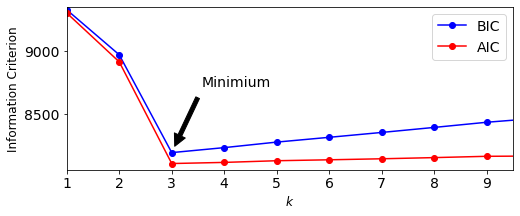

In [218]:
plt.rcParams['font.size'] = '14'

_, ax = plt.subplots(figsize=(8, 3))

ax.plot(range(1, 11), bics, "bo-", label="BIC")
ax.plot(range(1, 11), aics, "ro-", label="AIC")
ax.set(xlabel="$k$", ylabel="Information Criterion")
ax.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
ax.annotate('Minimium',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.legend()
plt.show()

 Let's search for best combination of values for both the number of clusters and the `covariance_type` hyperparameter:

In [219]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k,
                              n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type


In [220]:
best_k

3

In [221]:
best_covariance_type

'full'

 ## Variational Bayesian Gaussian Mixtures

 Rather than manually searching for the optimal number of clusters, it is possible to use instead the `BayesianGaussianMixture` class which is capable of giving weights equal (or close) to zero to unnecessary clusters. Just set the number of components to a value that you believe is greater than the optimal number of clusters, and the algorithm will eliminate the unnecessary clusters automatically.

In [222]:
from sklearn.mixture import BayesianGaussianMixture

In [223]:
bgm = BayesianGaussianMixture(n_components=10,n_init=10,random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

 The algorithm automatically detected that only 3 components are needed:

In [224]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth', 'lss'
  plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')


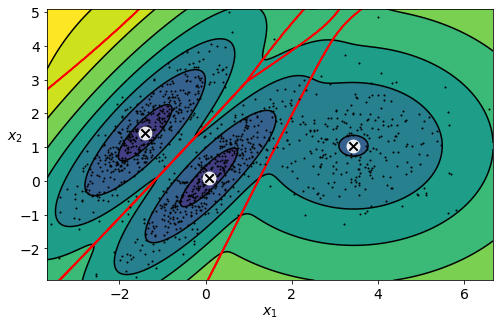

In [225]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [226]:
bgm_low = BayesianGaussianMixture(n_components=10,
                                  max_iter=1000,
                                  n_init=1,
                                  weight_concentration_prior=0.01,
                                  random_state=42)

bgm_high = BayesianGaussianMixture(
    n_components=10,
    max_iter=1000,
    n_init=1,
    weight_concentration_prior=10000,
    random_state=42)


In [227]:
nn = 73

bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [228]:
np.round(bgm_low.weights_, 2)


array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth', 'lss'
  plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth', 'lss'
  plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')


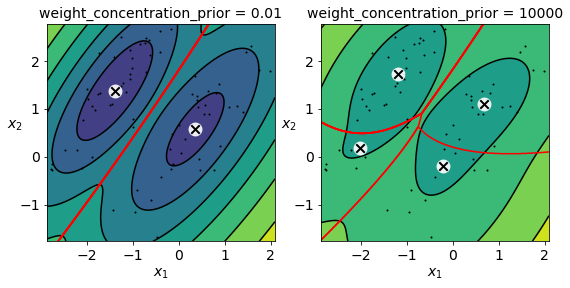

In [229]:
plt.figure(figsize=(9,4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low,X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high,X[:nn])
plt.title("weight_concentration_prior = 10000", fontsize=14)
plt.show()


 Note: the fact that you see only 3 regions in the right plot although there are 4 centroids is not a bug. The weight of the top-right cluster is much larger than the weight of the lower-right cluster, so the probability that any given point in this region belongs to the top right cluster is greater than the probability that it belongs to the lower-right cluster.

In [230]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05,random_state=42)

In [231]:
bgm = BayesianGaussianMixture(n_components=10,n_init=10,random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [232]:
bgm = BayesianGaussianMixture(n_components=10,n_init=10,random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,
/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_9373/3109741071.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth', 'lss'
  plt.contour(xx, yy, Z, linewidth=2, colors='r', lss='dashed')


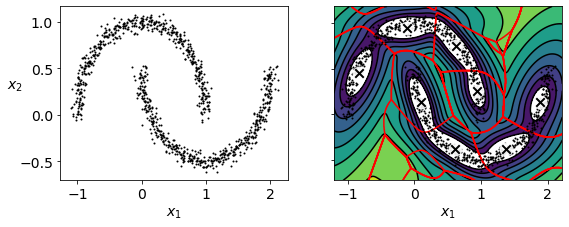

In [233]:
plt.figure(figsize=(9,3.2))


plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)


 Oops, not great... instead of detecting 2 moon-shaped clusters, the algorithm detected 8 ellipsoidal clusters. However, the density plot does not look too bad, so it might be usable for anomaly detection.

### Likelihood Fuction

In [234]:
from scipy.stats import norm

In [235]:
xx = np.linspace(-6,4,101)
ss = np.linspace(1,2,101)

XX, SS = np.meshgrid(xx, ss)

ZZ = 2 * norm.pdf(XX - 1.0,0,SS) + norm.pdf(XX +4 ,0,SS)
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])

In [236]:
from matplotlib.patches import Polygon

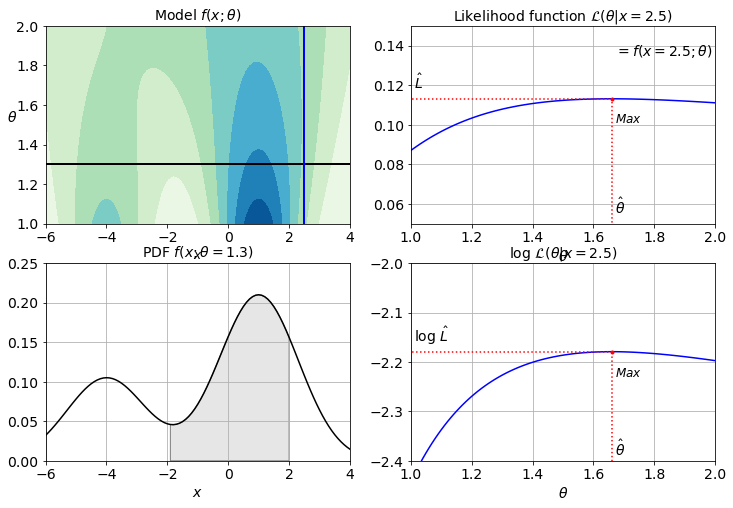

In [237]:
plt.figure(figsize=(12, 8))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", lw=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", lw=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$θ$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; θ)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx] + 0.01, 0.055, r"$\hat{θ}$", fontsize=14)
plt.text(ss[max_idx] + 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$θ$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; θ)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(θ|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; θ=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$θ$", fontsize=14)
plt.text(ss[max_idx] + 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx] + 0.01, -2.39, r"$\hat{θ}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(θ|x=2.5)$", fontsize=14)

plt.show()
